___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- El principal cambio que debemos hacer para clasificación es cambiar la salida de la red neuronal. Se le pone una función de activación no lineal a la salida, generalmente se usa la función Sigmoidal. 
- Como función de costo se usa el Cross Entropy en lugar de la Suma de Residuales
- Si tenemos una salida multiclase, se debe usar la función Softmax en lugar de la sigmoidal

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://deeplearningmath.org/images/shallow_NN.png" width="450px" height="280px" />



**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [1]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'diabetes.csv')

In [3]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "sigmoidal" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',#función de costo
              optimizer='sgd',#gradiente descendente
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 1s 6ms/step - loss: 0.8570 - accuracy: 0.2961
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8378 - accuracy: 0.3017
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 0.8188 - accuracy: 0.3091
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8013 - accuracy: 0.3222
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7855 - accuracy: 0.3352
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7694 - accuracy: 0.3538
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 0.7552 - accuracy: 0.3669
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7417 - accuracy: 0.3873
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7292 - accuracy: 0.4171
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 0.7170 - accuracy: 0.4749
Epoch 11/200
6/6 [===========

6/6 [==============================] - 0s 5ms/step - loss: 0.4847 - accuracy: 0.7672
Epoch 85/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4840 - accuracy: 0.7672
Epoch 86/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4834 - accuracy: 0.7691
Epoch 87/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4827 - accuracy: 0.7691
Epoch 88/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.7691
Epoch 89/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4814 - accuracy: 0.7672
Epoch 90/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4809 - accuracy: 0.7691
Epoch 91/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.7709
Epoch 92/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4797 - accuracy: 0.7709
Epoch 93/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4791 - accuracy: 0.7709
Epoch 94/200
6/6 [===============

Epoch 167/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4561 - accuracy: 0.7840
Epoch 168/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4559 - accuracy: 0.7840
Epoch 169/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4557 - accuracy: 0.7858
Epoch 170/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.7858
Epoch 171/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4554 - accuracy: 0.7858
Epoch 172/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4552 - accuracy: 0.7858
Epoch 173/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4551 - accuracy: 0.7858
Epoch 174/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4549 - accuracy: 0.7858
Epoch 175/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4547 - accuracy: 0.7858
Epoch 176/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.7858
Epoch 177/

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

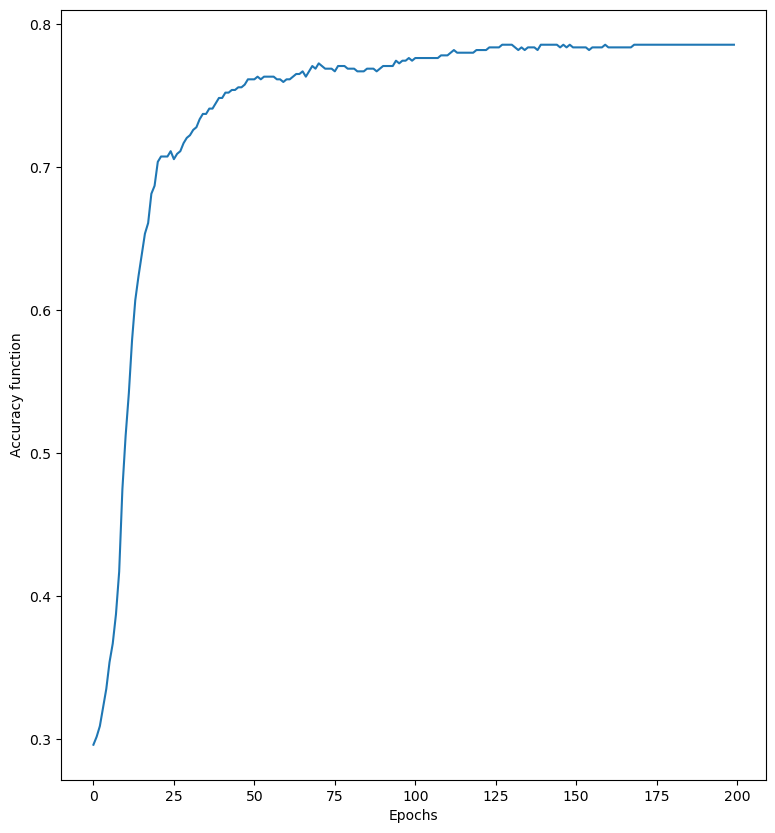

In [8]:
#Ver el performance del modelo en el entrenamiento (accuracy)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [9]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test) #predecir en términos de decimales
Y_prob = (model.predict(X_test) > 0.5).astype("int32") #en términos de 1 y 0


8/8 [==============================] - 0s 3ms/step


In [10]:
Y_pred

array([[0.36510164],
       [0.15138766],
       [0.11188409],
       [0.23069066],
       [0.5898862 ],
       [0.55698127],
       [0.02946669],
       [0.5293053 ],
       [0.6007182 ],
       [0.61794657],
       [0.1944676 ],
       [0.877264  ],
       [0.44304702],
       [0.3478235 ],
       [0.0648626 ],
       [0.3209956 ],
       [0.08028932],
       [0.0554718 ],
       [0.64065766],
       [0.5828658 ],
       [0.2639322 ],
       [0.05869066],
       [0.43217355],
       [0.07495958],
       [0.6243613 ],
       [0.8679116 ],
       [0.09964915],
       [0.04432927],
       [0.23348647],
       [0.1549975 ],
       [0.8829515 ],
       [0.6139562 ],
       [0.7618633 ],
       [0.68123436],
       [0.49831066],
       [0.77936274],
       [0.7477676 ],
       [0.2476972 ],
       [0.42091265],
       [0.6366381 ],
       [0.04900787],
       [0.4792663 ],
       [0.37728408],
       [0.41519234],
       [0.04615375],
       [0.6148401 ],
       [0.48209774],
       [0.137

In [11]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [12]:
#métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#métricas en el train
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))

#métricas en el test
accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 3ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.786 	 0.742 	 0.596
  Test 	 0.753 	 0.653 	 0.613


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [13]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [14]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
#creamos la variable target a dummies para poderla trabajar en la red neuronal
dummy_y = np_utils.to_categorical(Y).astype(int)

In [18]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [19]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [20]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
decay_rate = learning_rate/epochs
sgd = SGD(learning_rate=learning_rate, decay=decay_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',#funcion de costo
              optimizer=sgd,#gradiente descendente
              metrics=['accuracy'])

# entrenamiento de la red neuronal
#history = model.fit(X, dummy_y,epochs=200, batch_size=100, verbose=1)


history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200
2/2 [==============================] - 1s 319ms/step - loss: 3.2108 - accuracy: 0.3083 - val_loss: 1.0997 - val_accuracy: 0.3333
Epoch 2/200
2/2 [==============================] - 0s 41ms/step - loss: 1.1301 - accuracy: 0.3333 - val_loss: 1.0234 - val_accuracy: 0.3333
Epoch 3/200
2/2 [==============================] - 0s 46ms/step - loss: 1.0283 - accuracy: 0.3250 - val_loss: 1.0760 - val_accuracy: 0.4000
Epoch 4/200
2/2 [==============================] - 0s 38ms/step - loss: 1.0322 - accuracy: 0.5250 - val_loss: 0.9749 - val_accuracy: 0.3333
Epoch 5/200
2/2 [==============================] - 0s 39ms/step - loss: 0.9502 - accuracy: 0.3333 - val_loss: 0.9324 - val_accuracy: 0.3667
Epoch 6/200
2/2 [==============================] - 0s 43ms/step - loss: 0.9277 - accuracy: 0.3750 - val_loss: 0.8261 - val_accuracy: 0.6333
Epoch 7/200
2/2 [==============================] - 0s 48ms/step - loss: 0.8103 - accuracy: 0.6583 - val_loss: 0.7841 - val_accuracy: 0.7000
Epoch 8/200
2/2 [==

2/2 [==============================] - 0s 36ms/step - loss: 0.4746 - accuracy: 0.6750 - val_loss: 0.4756 - val_accuracy: 0.6333
Epoch 60/200
2/2 [==============================] - 0s 35ms/step - loss: 0.4736 - accuracy: 0.6750 - val_loss: 0.4739 - val_accuracy: 0.8333
Epoch 61/200
2/2 [==============================] - 0s 50ms/step - loss: 0.4720 - accuracy: 0.8500 - val_loss: 0.4718 - val_accuracy: 0.8333
Epoch 62/200
2/2 [==============================] - 0s 39ms/step - loss: 0.4684 - accuracy: 0.8833 - val_loss: 0.4699 - val_accuracy: 0.6333
Epoch 63/200
2/2 [==============================] - 0s 37ms/step - loss: 0.4627 - accuracy: 0.6750 - val_loss: 0.4640 - val_accuracy: 0.6333
Epoch 64/200
2/2 [==============================] - 0s 58ms/step - loss: 0.4540 - accuracy: 0.6750 - val_loss: 0.4567 - val_accuracy: 0.6333
Epoch 65/200
2/2 [==============================] - 0s 58ms/step - loss: 0.4427 - accuracy: 0.6750 - val_loss: 0.4490 - val_accuracy: 0.8333
Epoch 66/200
2/2 [========

2/2 [==============================] - 0s 41ms/step - loss: 0.1448 - accuracy: 0.9833 - val_loss: 0.2011 - val_accuracy: 0.9000
Epoch 118/200
2/2 [==============================] - 0s 39ms/step - loss: 0.1430 - accuracy: 0.9833 - val_loss: 0.4436 - val_accuracy: 0.8667
Epoch 119/200
2/2 [==============================] - 0s 72ms/step - loss: 0.2132 - accuracy: 0.9250 - val_loss: 0.1953 - val_accuracy: 0.9667
Epoch 120/200
2/2 [==============================] - 0s 54ms/step - loss: 0.1386 - accuracy: 0.9833 - val_loss: 0.2188 - val_accuracy: 0.8667
Epoch 121/200
2/2 [==============================] - 0s 58ms/step - loss: 0.1368 - accuracy: 0.9750 - val_loss: 0.2231 - val_accuracy: 0.8667
Epoch 122/200
2/2 [==============================] - 0s 60ms/step - loss: 0.1407 - accuracy: 0.9750 - val_loss: 0.1744 - val_accuracy: 0.9667
Epoch 123/200
2/2 [==============================] - 0s 52ms/step - loss: 0.1466 - accuracy: 0.9833 - val_loss: 0.3366 - val_accuracy: 0.8667
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 50ms/step - loss: 0.1218 - accuracy: 0.9750 - val_loss: 0.2725 - val_accuracy: 0.8667
Epoch 176/200
2/2 [==============================] - 0s 62ms/step - loss: 0.1296 - accuracy: 0.9500 - val_loss: 0.2369 - val_accuracy: 0.8667
Epoch 177/200
2/2 [==============================] - 0s 44ms/step - loss: 0.1188 - accuracy: 0.9583 - val_loss: 0.1481 - val_accuracy: 0.9667
Epoch 178/200
2/2 [==============================] - 0s 40ms/step - loss: 0.1133 - accuracy: 0.9750 - val_loss: 0.2263 - val_accuracy: 0.8667
Epoch 179/200
2/2 [==============================] - 0s 39ms/step - loss: 0.1128 - accuracy: 0.9583 - val_loss: 0.1513 - val_accuracy: 0.9667
Epoch 180/200
2/2 [==============================] - 0s 47ms/step - loss: 0.1375 - accuracy: 0.9500 - val_loss: 0.1441 - val_accuracy: 0.9667
Epoch 181/200
2/2 [==============================] - 0s 58ms/step - loss: 0.1239 - accuracy: 0.9750 - val_loss: 0.1514 - val_accuracy: 0.9667
Epoch 

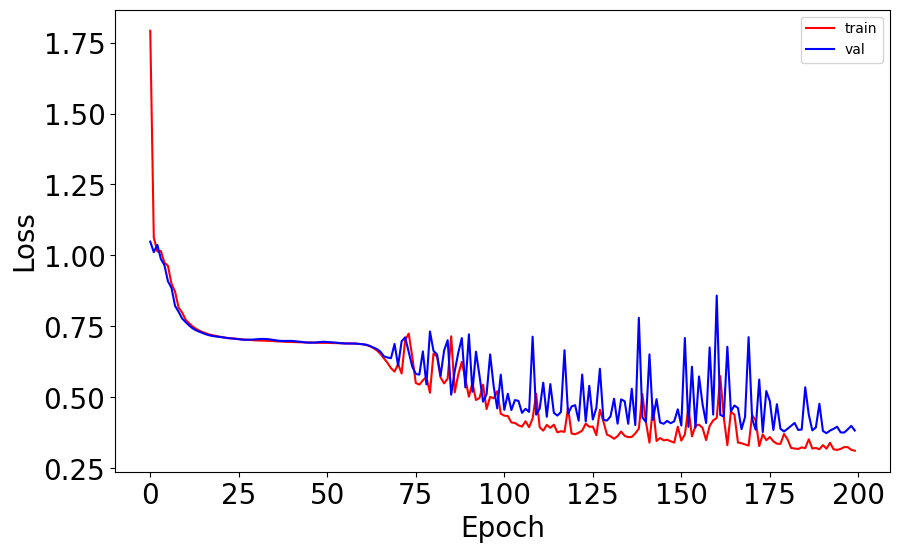

In [21]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [22]:
#Predecir con el modelo
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 21ms/step


In [23]:
Y_pred

array([[1.71570145e-02, 9.69451427e-01, 1.33915571e-02],
       [9.98067439e-01, 1.93261961e-03, 3.36525135e-26],
       [3.12459306e-04, 7.53104910e-02, 9.24377024e-01],
       [1.71324871e-02, 9.69390690e-01, 1.34767145e-02],
       [2.18294766e-02, 9.73723352e-01, 4.44711093e-03],
       [9.94890571e-01, 5.10944705e-03, 8.55081361e-24],
       [1.10802628e-01, 8.89196038e-01, 1.32383582e-06],
       [5.37355198e-04, 1.16773561e-01, 8.82689059e-01],
       [6.38977974e-04, 1.34212226e-01, 8.65148783e-01],
       [5.81118874e-02, 9.41850424e-01, 3.76417411e-05],
       [2.19502719e-03, 3.52370530e-01, 6.45434439e-01],
       [9.88517165e-01, 1.14829000e-02, 8.76640702e-22],
       [9.98412967e-01, 1.58706796e-03, 1.09731422e-26],
       [9.89728570e-01, 1.02714375e-02, 4.62675024e-22],
       [9.97490883e-01, 2.50907079e-03, 1.48655007e-25],
       [3.12230214e-02, 9.67971683e-01, 8.05278367e-04],
       [3.12459306e-04, 7.53104910e-02, 9.24377024e-01],
       [3.61957885e-02, 9.63411

In [24]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [25]:
#Hacer ingenería en reversa, para dejar las predicciones en el formato original que teníamos de las "Y"
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = np_utils.to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [26]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [27]:
#Métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#métricas en el train
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')


#métricas en el test
Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 34ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.983 	 0.984 	 0.983
  Test 	 0.967 	 0.969 	 0.967
